In [5]:
import pandas as pd

# Load the data from a CSV file
csv_name = '../data/preprocessed_data.csv'
data = pd.read_csv(csv_name)

# The first column is irrelevant, the second column is the label
# Divide the remaining columns into two datasets
NMR_FIRST_FEATURE = 60
data1 = data.iloc[:, 1:NMR_FIRST_FEATURE - 1].values
data2 = data.iloc[:, NMR_FIRST_FEATURE - 1:].values

# Normalize the data
row_normalization = False
if row_normalization:
    # Normalize each row
    data1 = (data1 - data1.mean(axis=1, keepdims=True)) / data1.std(axis=1, keepdims=True)
    data2 = (data2 - data2.mean(axis=1, keepdims=True)) / data2.std(axis=1, keepdims=True)
# Normalize each column
data1 = (data1 - data1.mean(axis=0)) / data1.std(axis=0)
data2 = (data2 - data2.mean(axis=0)) / data2.std(axis=0)
    

[0.25646931 0.11934299 0.05078294]
[[ 1.46215281e-02  2.18186395e-02  2.99865363e-02  1.22642529e-02
   1.10856479e-02  2.10086257e-02  7.10815773e-03  1.12124335e-02
   1.83039649e-02  1.75936177e-02  1.52489209e-02  1.68965750e-03
   6.69486348e-03  7.51600883e-03  2.45422408e-02  2.08914138e-02
   3.87529538e-03  1.46413760e-02  5.26900028e-03  8.95567850e-03
   2.68387185e-03  3.32782421e-03  1.70027973e-02  3.67628991e-03
   1.08163170e-02  7.97593271e-04  2.07291595e-03  3.73763610e-02
   1.02009550e-02  2.68134725e-02  1.34973978e-02  6.54125291e-03
   4.60843859e-03  1.33169444e-02  3.68785601e-03  4.81989999e-03
   2.69783058e-02 -1.81715547e-03  7.63414572e-04  2.36229474e-02
   1.50680393e-02  3.93554567e-03  6.30849900e-03  6.62920375e-03
   8.26372136e-03  9.19828620e-04  4.97519798e-03  1.32359096e-02
   9.42268806e-03  1.89348656e-02  4.84802275e-03  1.43676817e-02
   4.55826155e-03  4.71271978e-03 -9.64112667e-05  2.88810899e-02
   2.77200439e-02  1.04329795e-02  8.6316

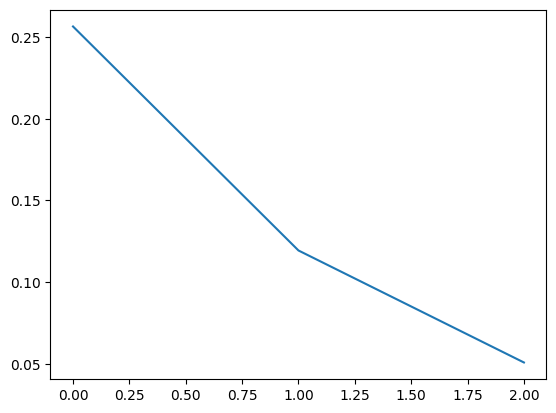

/Users/franky/Downloads/445-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


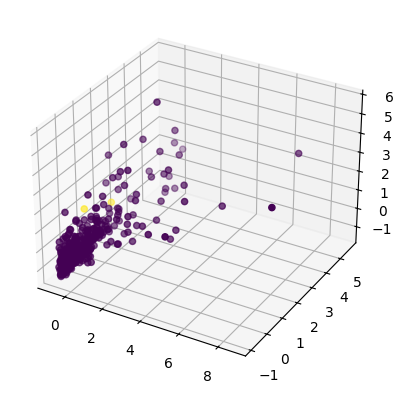

In [6]:
# Combine the two datasets
data = pd.DataFrame(data1)
data = pd.concat([data, pd.DataFrame(data2)], axis=1)

# Perform PCA, print out top 10 eigenvectors, and plot the explained variance
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
pca.fit(data)
print(pca.explained_variance_ratio_)
print(pca.components_)
plt.plot(pca.explained_variance_ratio_)
plt.show()

# Project the data onto the first 3 principal components, K-means clustering
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2)
kmeans.fit(data)
labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data.iloc[:, 0], data.iloc[:, 1], data.iloc[:, 2], c=labels)
plt.show()




In [3]:
# PD data

# Load the data from a CSV file
NMR_csv_name = '../data/PD_Serum_Metabolomics_Final_NMR.csv'
MS_csv_name = '../data/preprocessed_data_PD.csv'

NMR_data = pd.read_csv(NMR_csv_name)
MS_data = pd.read_csv(MS_csv_name)

# Labels are first column of MS data
# Remove 305h row from MS data, because it is missing from NMR data
data3 = (NMR_data.values)
data4 = (MS_data.drop(index=305).iloc[:, 1:].values)

[0.28174369 0.10530467 0.0627186 ]


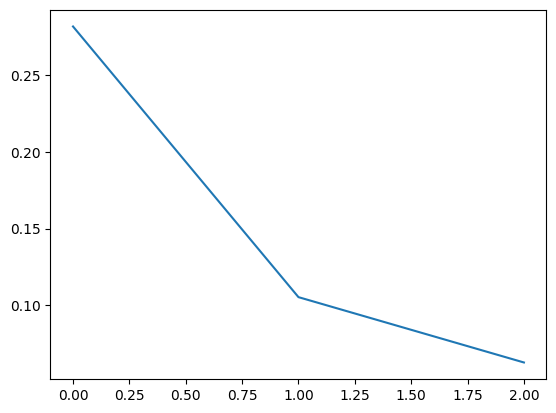

/Users/franky/Downloads/445-env/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


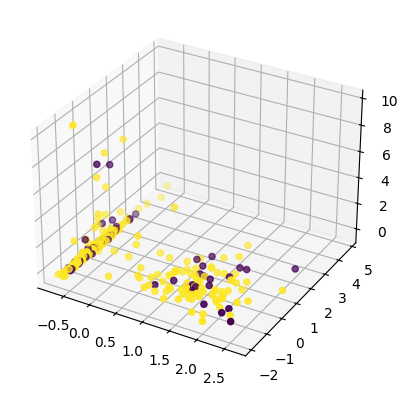

In [4]:
# Normalize the data
row_normalization = False
if row_normalization:
    # Normalize each row
    data3 = (data3 - data3.mean(axis=1, keepdims=True)) / data3.std(axis=1, keepdims=True)
    data4 = (data4 - data4.mean(axis=1, keepdims=True)) / data4.std(axis=1, keepdims=True)
# Normalize each column
data3 = (data3 - data3.mean(axis=0)) / data3.std(axis=0)
data4 = (data4 - data4.mean(axis=0)) / data4.std(axis=0)

# Combine the two datasets

PD_data = pd.DataFrame(data3)
PD_data = pd.concat([PD_data, pd.DataFrame(data4)], axis=1)

# Perform PCA, and plot the explained variance
pca = PCA(n_components=3)
pca.fit(PD_data)
print(pca.explained_variance_ratio_)
plt.plot(pca.explained_variance_ratio_)
plt.show()

# Plot the first three principal components, colored by clustering into 2 groups

kmeans = KMeans(n_clusters=2)
kmeans.fit(PD_data)
labels = kmeans.labels_

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PD_data.iloc[:, 0], PD_data.iloc[:, 1], PD_data.iloc[:, 2], c=labels)
plt.show()